In [11]:
from sympy import *
init_printing()

In [12]:
#Ángulo sólido de la placa
def omega(largo, ancho, altura):
    #Parámetros cónicos
    a = largo/(2*altura)
    b = ancho/(2*altura)
    #Parámetros intermedios
    numerador = 1 + a**2 + b**2
    denominador = (1+a**2)*(1+b**2)
    cociente = numerador/denominador
    #Resultado final
    omega = 4*acos(sqrt(cociente))
    return omega

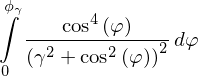

In [13]:
#Para el flujo la integral que hay que hacer es esta (cuentas en cuaderno física 4 verano)
phi = symbols('varphi') #el ángulo azimutal
gamma = symbols('gamma') #el parámetro cónico correspondiente
integrando = (cos(phi)/sqrt(cos(phi)**2+gamma**2))**4
Integral(integrando,(phi,0,symbols('\phi_{\gamma}'))) #el límite depende de cuál parámetro cónico es

In [14]:
#Flujo de muones
intensidad = 0.007 #(muones por cm2 por s por str)
#Dimensiones de la placa
a = 2*20
b = 2*4
d = 2
area = a/2*b/2
#Límites de integración
alphalim = atan(b/a)
betalim = atan(a/b)
#Parámetros cónicos
alpha = a/2/d
beta = b/2/d

alphalim

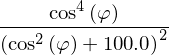

In [15]:
#Funciones a integrar
alphafunc = integrando.subs(gamma,alpha)
betafunc = integrando.subs(gamma,beta)
#Luego hay que hacer pi/2 - int(alphafunc) - int(betafunc)
alphafunc

In [16]:
#Hacemos numérico el integrando
integrandoAlpha = lambdify(phi,alphafunc)
integrandoBeta = lambdify(phi,betafunc)
integrandoBeta(.5)

In [17]:
from scipy.integrate import quad
#Integramos numéricamente
integralAlpha = quad(integrandoAlpha,0,alphalim)[0]
integralBeta = quad(integrandoBeta,0,betalim)[0]
flujoporunidad = (pi/2 - integralAlpha - integralBeta).evalf()
flujoporunidad

In [18]:
#El flujo real en minutos es
flujoporunidad*area*intensidad*60

In [19]:
#Como referencia, el ángulo sólido contenido es
anguloesfera = symbols('4\pi')
(omega(a,b,d)/4/pi).evalf(2)*anguloesfera

In [20]:
#Si hacemos angulo solido * intensidad * area
omega(a,b,d)*area*intensidad*60